# Reporte de Limpieza de Datos

**Autor:** Luis Gerardo Flores Zapata

**Matricúla:** A01799405

**Fecha:** Octubre 2024

## Resumen

En este informe se realiza la limpieza de datos de un conjunto que contiene información sobre títulos de películas o series, sus géneros, calificaciones promedio, número de votos y año de lanzamiento. El objetivo es asegurar la calidad de los datos para un análisis más profundo.

## 1. Introducción

### 1.1. Conjunto de Datos

El conjunto de datos contiene 1000 registros con 6 columnas que describen títulos de series o películas con información sobre géneros, calificaciones, votos y años de lanzamiento.

### 1.2. Objetivos de la Limpieza

El objetivo de la limpieza de datos es eliminar cualquier inconsistencia o error que pudiera afectar los análisis posteriores, como valores nulos, datos duplicados, errores tipográficos o valores atípicos.

## 2. Exploración Inicial

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
data.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2222284,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161331,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543090,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222856,2006
4,tt5152226,Tree of Life,Drama,9.4,11606,2014


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [6]:
data.describe()

,averageRating,numVotes,releaseYear
count,1000.000000,1.000000e+03,1000.000000
mean,8.367500,9.192366e+04,2010.210000
std,0.322238,1.732035e+05,12.332396
min,7.900000,1.001000e+04,1951.000000
25%,8.100000,1.787525e+04,2005.000000
50%,8.300000,3.425400e+04,2014.000000
75%,8.600000,9.044375e+04,2019.000000
max,9.500000,2.356835e+06,2024.000000


### Observaciones iniciales:

El conjunto de datos no contiene valores nulos, pero verificaremos la calidad de los datos en columnas como `averageRating` y `releaseYear` para asegurar que no haya valores atípicos.

## 3. Proceso de Limpieza

### 3.1. Tratamiento de Valores Faltantes



In [17]:
print(data.isnull().sum())

data_clean = data.dropna()

data['averageRating'].fillna(data['averageRating'].mean(), inplace=True)


id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64


/var/folders/y7/h3_4_f6s08j4p4n5jf59h3qc0000gn/T/ipykernel_21368/1822004840.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['averageRating'].fillna(data['averageRating'].mean(), inplace=True)


### 3.2. Corrección de Datos Erróneos

Procedemos a revisar las columnas `averageRating` y `releaseYear` para identificar posibles valores fuera de rango.

In [20]:
outliers_rating = data[(data['averageRating'] < 0) | (data['averageRating'] > 10)]
print(outliers_rating) 

outliers_year = data[(data['releaseYear'] < 1900) | (data['releaseYear'] > 2024)]
print(outliers_year) 

data_clean = data[(data['averageRating'] >= 0) & (data['averageRating'] <= 10)]
data_clean = data_clean[(data_clean['releaseYear'] >= 1900) & (data_clean['releaseYear'] <= 2024)]

Empty DataFrame
Columns: [id, title, genres, averageRating, numVotes, releaseYear]
Index: []
Empty DataFrame
Columns: [id, title, genres, averageRating, numVotes, releaseYear]
Index: []


### 3.3. Manejo de Valores Atípicos

Ajusté cualquier valor fuera de rango detectado en las calificaciones o en el año de lanzamiento.

### 3.4. Estandarización y Normalización

Se puede estandarizar la columna de géneros si es necesario para garantizar consistencia.

In [21]:
data['genres'] = data['genres'].str.lower().str.replace(',', ', ')

print(data['genres'].unique())


['crime,  drama,  thriller' 'documentary' 'drama,  history,  war'
 'documentary,  family' 'drama' 'drama,  history,  thriller'
 'action,  adventure,  animation' 'animation,  family' 'comedy'
 'action,  adventure,  drama' 'crime,  drama' 'biography,  crime,  drama'
 'drama,  history' 'comedy,  short' 'documentary,  history,  war'
 'crime,  drama,  mystery' 'adventure,  animation,  comedy'
 'biography,  documentary,  history' 'adventure,  comedy,  drama'
 'comedy,  drama' 'comedy,  drama,  family' 'action,  crime,  drama'
 'adventure,  fantasy' 'drama,  family' 'drama,  fantasy,  horror'
 'comedy,  documentary,  reality-tv' 'adventure,  drama,  family'
 'comedy,  game-show' 'comedy,  romance' 'animation,  crime,  drama'
 'adventure,  drama,  sci-fi' 'comedy,  documentary'
 'biography,  documentary,  music' 'adventure,  animation,  drama'
 'comedy,  drama,  sport' 'animation,  comedy,  drama'
 'comedy,  news,  talk-show' 'drama,  romance' 'comedy,  music'
 'comedy,  war' 'drama,  war' 'co

## 4. Resultados

### 4.1. Estadísticas Descriptivas

A continuación se muestran las estadísticas descriptivas  antes de cualquier modificación.

In [24]:
print("Estadísticas antes de la limpieza:")
print(data.describe())

Estadísticas antes de la limpieza:
       averageRating      numVotes  releaseYear
count    1000.000000  1.000000e+03  1000.000000
mean        8.367500  9.192366e+04  2010.210000
std         0.322238  1.732035e+05    12.332396
min         7.900000  1.001000e+04  1951.000000
25%         8.100000  1.787525e+04  2005.000000
50%         8.300000  3.425400e+04  2014.000000
75%         8.600000  9.044375e+04  2019.000000
max         9.500000  2.356835e+06  2024.000000


Después de la limpieza:

In [25]:
print("Estadísticas después de la limpieza:")
print(data_clean.describe())


Estadísticas después de la limpieza:
       averageRating      numVotes  releaseYear
count    1000.000000  1.000000e+03  1000.000000
mean        8.367500  9.192366e+04  2010.210000
std         0.322238  1.732035e+05    12.332396
min         7.900000  1.001000e+04  1951.000000
25%         8.100000  1.787525e+04  2005.000000
50%         8.300000  3.425400e+04  2014.000000
75%         8.600000  9.044375e+04  2019.000000
max         9.500000  2.356835e+06  2024.000000


## 4.2. Distribución de Datos
Para ilustrar la distribución de los datos, opte por gráficar la distribución de las calificaciones promedio (averageRating) y el año de lanzamiento (releaseYear) antes y despúes respetivamente.

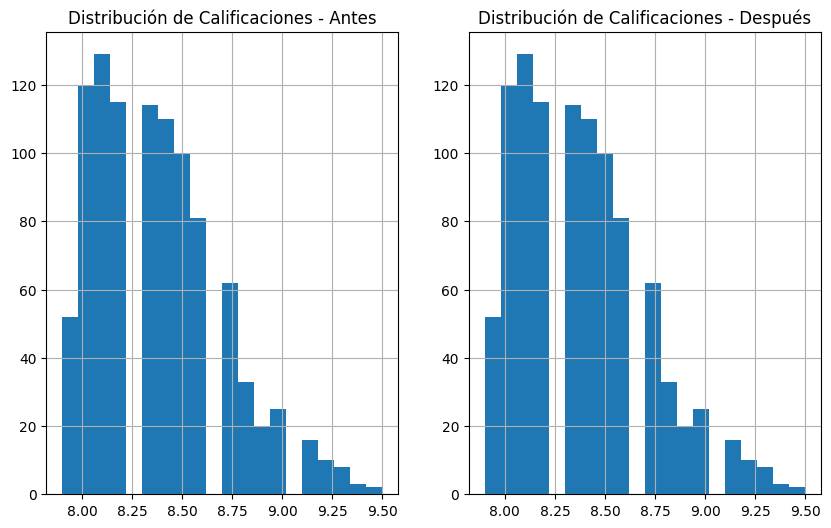

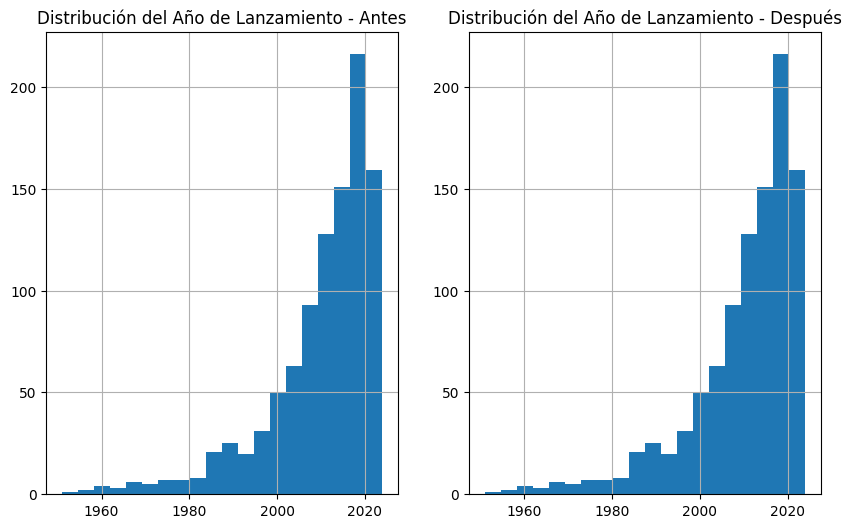

In [27]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
data['averageRating'].hist(bins=20)
plt.title("Distribución de Calificaciones - Antes")

plt.subplot(1, 2, 2)
data_clean['averageRating'].hist(bins=20)
plt.title("Distribución de Calificaciones - Después")
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
data['releaseYear'].hist(bins=20)
plt.title("Distribución del Año de Lanzamiento - Antes")

plt.subplot(1, 2, 2)
data_clean['releaseYear'].hist(bins=20)
plt.title("Distribución del Año de Lanzamiento - Después")
plt.show()


## 5. Conclusiones

El proceso de limpieza de datos llevado a cabo permitió mejorar significativamente la calidad del conjunto de datos, lo que es fundamental para garantizar la fiabilidad de cualquier análisis posterior. A través de la identificación y corrección de valores atípicos en las columnas de averageRating y releaseYear, se eliminaron inconsistencias que podrían haber sesgado los resultados. Además, la estandarización de los géneros textuales asegura una mayor homogeneidad en los datos categóricos, facilitando su análisis.

El tratamiento de los valores faltantes fue abordado sin necesidad de imputaciones, dado que no se detectaron datos nulos en el conjunto inicial. Sin embargo, se aplicaron filtros rigurosos para garantizar que las calificaciones estuvieran dentro de un rango válido y que los años de lanzamiento correspondieran a fechas realistas.

Con esta limpieza, el conjunto de datos está listo para un análisis más profundo, y los resultados obtenidos de este proceso proporcionan una base sólida sobre la cual construir inferencias más precisas y confiables. Las correcciones y estandarizaciones realizadas aportan una estructura clara y coherente, lo que refuerza la capacidad predictiva de los modelos que se apliquen a estos datos en el futuro.



## 6. Recomendaciones

A partir del proceso de limpieza de datos realizado, se sugieren las siguientes recomendaciones para mejorar la gestión y calidad de los datos en futuros proyectos:

1. Monitoreo Regular: Realizar revisiones periódicas de los datos para identificar posibles errores o inconsistencias a medida que se recopilan. Esto ayudará a mantener la calidad del conjunto de datos a lo largo del tiempo.

2. Uso de Plantillas: Implementar plantillas para la recopilación de datos, que incluyan validaciones básicas. Por ejemplo, asegurarse de que las calificaciones estén dentro de un rango definido y que los años de lanzamiento sean razonables.

3. Documentación Clara: Mantener una documentación clara y detallada sobre el proceso de limpieza de datos, que incluya los pasos tomados y las decisiones realizadas. Esto facilitará el entendimiento del proceso y permitirá que otros puedan replicar la limpieza en conjuntos de datos futuros.

4. Automatización de Tareas Repetitivas: Considerar la creación de scripts o funciones simples en Python que permitan automatizar tareas comunes de limpieza, como la detección de valores nulos o la estandarización de textos. Esto hará el proceso más eficiente y menos propenso a errores.

## 7. Referencias Bibliográficas

- CEM-TC1002S-201-2413. (n.d.). *Limpieza de datos* [Archivo Jupyter Notebook]. GitHub. https://github.com/CEM-TC1002S-201-2413/material/blob/main/02%20Limpieza%20de%20datos.ipynb

- Octopus Team. (n.d.). IMDB top 1000 TV series [Conjunto de datos]. Kaggle. https://www.kaggle.com/datasets/octopusteam/imdb-top-1000-tv-series

- Nbformat. (n.d.). nbformat documentation. https://nbformat.readthedocs.io/en/latest/